In [4]:
import rioxarray

In [5]:
from pystac_client import Client

In [6]:
client = Client.open("https://earth-search.aws.element84.com/v1")

In [7]:
collection = "sentinel-2-l2a"

In [8]:
from shapely.geometry import Point

In [9]:
point = Point(4.89, 52.37)

In [10]:
search = client.search(
    collections=[collection],
    intersects=point,
    max_items=10,
)

In [11]:
print(search.matched())

1128


In [12]:
items = search.item_collection()

In [13]:
print(len(items))

10


In [14]:
for item in items:
    print(item)

<Item id=S2A_31UFU_20240110_0_L2A>
<Item id=S2A_31UFU_20240107_0_L2A>
<Item id=S2B_31UFU_20240105_0_L2A>
<Item id=S2B_31UFU_20240102_0_L2A>
<Item id=S2A_31UFU_20231231_0_L2A>
<Item id=S2A_31UFU_20231228_0_L2A>
<Item id=S2B_31UFU_20231226_0_L2A>
<Item id=S2B_31UFU_20231223_0_L2A>
<Item id=S2A_31UFU_20231221_0_L2A>
<Item id=S2A_31UFU_20231218_0_L2A>


In [15]:
item = items[0]
print(item.datetime)
print(item.geometry)
print(item.properties)

2024-01-10 10:56:18.003000+00:00
{'type': 'Polygon', 'coordinates': [[[4.498475093400055, 53.240199174677954], [4.464995307918359, 52.25346561204129], [6.071664488869862, 52.22257539160585], [6.141754296879459, 53.20819279121764], [4.498475093400055, 53.240199174677954]]]}
{'created': '2024-01-10T17:23:09.195Z', 'platform': 'sentinel-2a', 'constellation': 'sentinel-2', 'instruments': ['msi'], 'eo:cloud_cover': 0.726346, 'proj:epsg': 32631, 'mgrs:utm_zone': 31, 'mgrs:latitude_band': 'U', 'mgrs:grid_square': 'FU', 'grid:code': 'MGRS-31UFU', 'view:sun_azimuth': 168.085907244222, 'view:sun_elevation': 14.487068962718297, 's2:degraded_msi_data_percentage': 0.0067, 's2:nodata_pixel_percentage': 0.000136, 's2:saturated_defective_pixel_percentage': 0, 's2:dark_features_percentage': 0.046612, 's2:cloud_shadow_percentage': 0.044157, 's2:vegetation_percentage': 22.786395, 's2:not_vegetated_percentage': 37.997738, 's2:water_percentage': 37.733451, 's2:unclassified_percentage': 0.045126, 's2:medium

In [16]:
bbox = point.buffer(0.01).bounds

In [17]:
search = client.search(
    collections=[collection],
    bbox=bbox,
    datetime="2020-03-20/2020-03-30",
    query=["eo:cloud_cover<15"]
)
print(search.matched())

6


In [18]:
items = search.item_collection()
items.save_object("search.json")

In [19]:
assets = items[0].assets
print(assets.keys())

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])


In [20]:
for key, asset in assets.items():
    print(f"{key}: {asset.title}")



aot: Aerosol optical thickness (AOT)
blue: Blue (band 2) - 10m
coastal: Coastal aerosol (band 1) - 60m
granule_metadata: None
green: Green (band 3) - 10m
nir: NIR 1 (band 8) - 10m
nir08: NIR 2 (band 8A) - 20m
nir09: NIR 3 (band 9) - 60m
red: Red (band 4) - 10m
rededge1: Red edge 1 (band 5) - 20m
rededge2: Red edge 2 (band 6) - 20m
rededge3: Red edge 3 (band 7) - 20m
scl: Scene classification map (SCL)
swir16: SWIR 1 (band 11) - 20m
swir22: SWIR 2 (band 12) - 20m
thumbnail: Thumbnail image
tileinfo_metadata: None
visual: True color image
wvp: Water vapour (WVP)
aot-jp2: Aerosol optical thickness (AOT)
blue-jp2: Blue (band 2) - 10m
coastal-jp2: Coastal aerosol (band 1) - 60m
green-jp2: Green (band 3) - 10m
nir-jp2: NIR 1 (band 8) - 10m
nir08-jp2: NIR 2 (band 8A) - 20m
nir09-jp2: NIR 3 (band 9) - 60m
red-jp2: Red (band 4) - 10m
rededge1-jp2: Red edge 1 (band 5) - 20m
rededge2-jp2: Red edge 2 (band 6) - 20m
rededge3-jp2: Red edge 3 (band 7) - 20m
scl-jp2: Scene classification map (SCL)
swi

In [21]:
print(assets["thumbnail"].href)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/thumbnail.jpg


In [22]:
import rioxarray

In [23]:
nir_href = assets["nir"].href

In [24]:
nir = rioxarray.open_rasterio(nir_href)

In [25]:
print(nir)

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0


In [26]:
nir.rio.to_raster("nir.tif")

In [27]:
nir[0,1500:2200,1500:2200].rio.to_raster("nir_subset.tif")

In [28]:
cmr_api_url = "https://cmr.earthdata.nasa.gov/stac/LPCLOUD"
client = Client.open(cmr_api_url)
search = client.search(
    collections = ["HLSL30.v2.0"],
    intersects = Point(-73.97, 40.78),
    datetime = "2021-02-01/2021-03-30",
)
items = search.item_collection()
print(len(items))

5


In [29]:
items_sorted = sorted(items, key=lambda x: x.properties["eo:cloud_cover"]) # sorting and then selecting by cloud cover
item = items_sorted[0]
print(item)

<Item id=HLS.L30.T18TWL.2021039T153324.v2.0>


In [30]:
print(item.assets["browse"].href)

https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.jpg


In [31]:
import pystac

In [32]:
items = pystac.ItemCollection.from_file("search.json")

In [33]:
import rioxarray

In [34]:
raster_ams_b9 = rioxarray.open_rasterio(items[0].assets["nir09"].href)

In [35]:
raster_ams_b9

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [36]:
print(raster_ams_b9.rio.crs)
print(raster_ams_b9.rio.nodata)
print(raster_ams_b9.rio.bounds())
print(raster_ams_b9.rio.width)
print(raster_ams_b9.rio.height)

EPSG:32631
0
(600000.0, 5790240.0, 709800.0, 5900040.0)
1830
1830


In [37]:
raster_ams_b9.values

array([[[    0,     0,     0, ..., 10061, 10200, 10172],
        [    0,     0,     0, ..., 10424, 10315,  9763],
        [    0,     0,     0, ..., 10328, 10648, 10405],
        ...,
        [    0,     0,     0, ...,  4298,  4343,  4315],
        [    0,     0,     0, ...,  4284,  4284,  4155],
        [    0,     0,     0, ...,  3935,  3545,  3958]]], dtype=uint16)

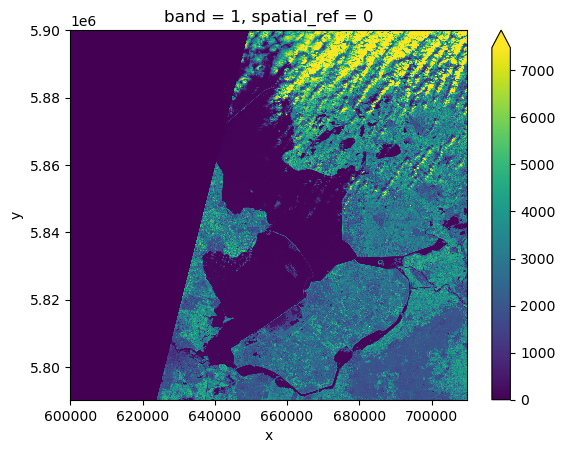

In [38]:
raster_ams_b9.plot(robust=True)

In [39]:
raster_ams_overview.plot.imshow(size=5, aspect=1)

NameError: name 'raster_ams_overview' is not defined

In [ ]:
import geopandas as gpd

In [ ]:
fields = gpd.read_file("data/brpgewaspercelen_definitief_2020_small.gpkg")
fields


In [ ]:
xmin, xmax = (110_000, 140_000)
ymin, ymax = (470_000, 510_000)
bbox = (xmin, ymin, xmax, ymax)


In [ ]:
fields = gpd.read_file("data/brpgewaspercelen_definitief_2020_small.gpkg", bbox=bbox)